<a href="https://colab.research.google.com/github/tcnisaa/metnum_pertemuan11_Tangguh-Chairunnisa/blob/main/metnum_pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tangguh Chairunnisa - 21120122140103

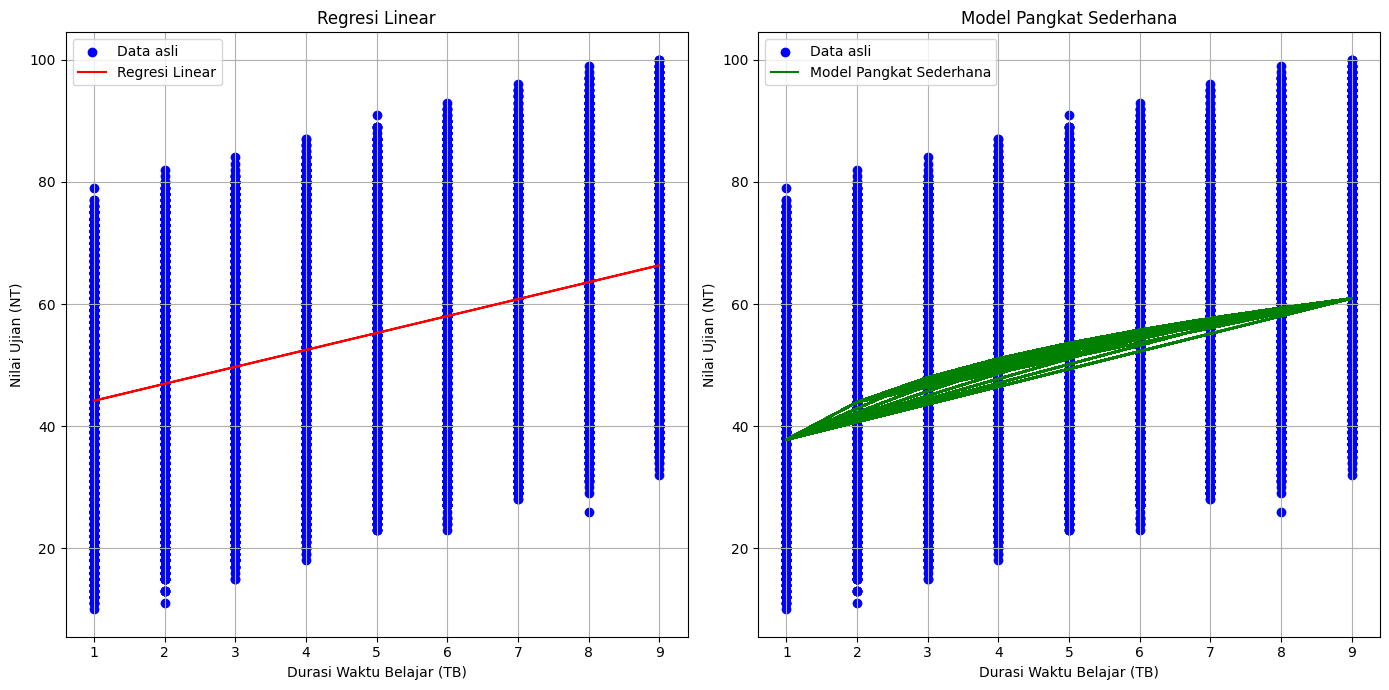

RMS galat - Regresi Linear: 17.819474832547773
RMS galat - Model Pangkat Sederhana: 18.175837301582977


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Impor data dari file CSV
file_path = 'Student_Performance.csv'  # ganti dengan path file CSV Anda
df = pd.read_csv(file_path)

# Asumsikan file CSV memiliki kolom 'Hours Studied' dan 'Performance Index'
X = df['Hours Studied'].values.reshape(-1, 1)
y = df['Performance Index'].values

# Metode 1: Model Linear
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Metode 2: Model Pangkat Sederhana
log_X = np.log(X)
log_y = np.log(y)
power_model = LinearRegression()
power_model.fit(log_X, log_y)
a = np.exp(power_model.intercept_)
b = power_model.coef_[0]
y_pred_power = a * (X ** b)

# Menghitung galat RMS
rms_linear = np.sqrt(mean_squared_error(y, y_pred_linear))
rms_power = np.sqrt(mean_squared_error(y, y_pred_power))

# Plot hasil regresi
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data asli')
plt.plot(X, y_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data asli')
plt.plot(X, y_pred_power, color='green', label='Model Pangkat Sederhana')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Model Pangkat Sederhana')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"RMS galat - Regresi Linear: {rms_linear}")
print(f"RMS galat - Model Pangkat Sederhana: {rms_power}")
